# EuroSAT Data Analysis

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from pathlib import Path
from collections import Counter

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

%matplotlib inline

## Load dataset

In [2]:
def load_eurosat_dataset(data_dir="data"):
    data_path = Path(data_dir)

    # Get all class directories
    class_dirs = [d for d in data_path.iterdir() if d.is_dir()]
    class_names = sorted([d.name for d in class_dirs])

    print(f"Found {len(class_names)} classes: {class_names}")

    images = []
    labels = []

    # Load images from each class
    for class_idx, class_name in enumerate(class_names):
        class_path = data_path / class_name
        image_files = list(class_path.glob("*.jpg")) + list(class_path.glob("*.png"))

        print(f"Loading {len(image_files)} images from {class_name}...")

        for img_path in image_files:
            try:
                # Load image
                img = Image.open(img_path)
                img_array = np.array(img)

                # Store image and label
                images.append(img_array)
                labels.append(class_idx)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    # Convert to numpy arrays
    data = np.array(images)
    labels = np.array(labels)

    print(f"\nDataset loaded successfully!")
    print(f"Total images           : {len(data)}")
    print(f"Data shape             : {data.shape}")
    print(f"Labels shape           : {labels.shape}")

    return data, labels, class_names


# Load the dataset
data, labels, class_names = load_eurosat_dataset("data")

Found 10 classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Loading 3000 images from AnnualCrop...
Loading 3000 images from Forest...
Loading 3000 images from HerbaceousVegetation...
Loading 2500 images from Highway...
Loading 2500 images from Industrial...
Loading 2000 images from Pasture...
Loading 2500 images from PermanentCrop...
Loading 3000 images from Residential...
Loading 2500 images from River...
Loading 3000 images from SeaLake...

Dataset loaded successfully!
Total images           : 27000
Data shape             : (27000, 64, 64, 3)
Labels shape           : (27000,)


## Preview dataset

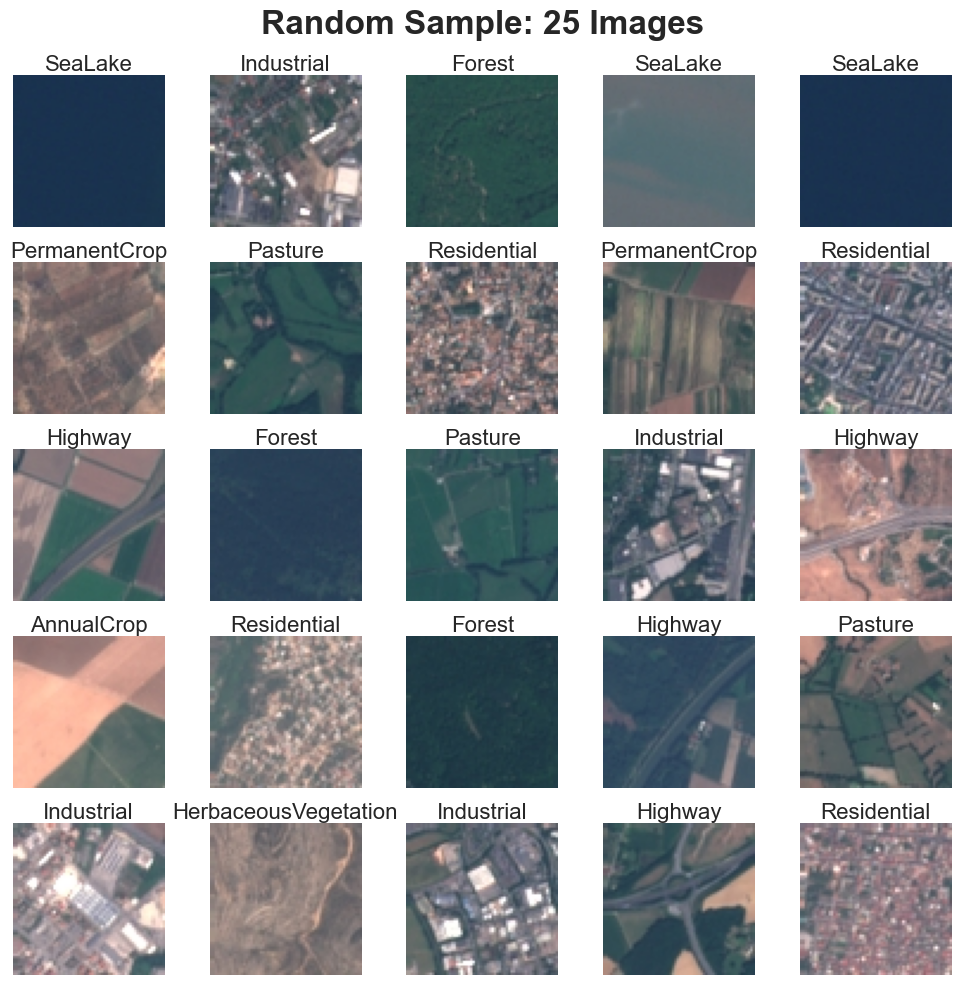

In [3]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

random_indices = np.random.choice(len(data), size=25, replace=False)

for i, ax in enumerate(axes.flat):
    idx = random_indices[i]
    img = data[idx]
    label = labels[idx]
    class_name = class_names[label]

    # Display image
    ax.imshow(img)
    ax.set_title(class_name, fontsize=16, pad=3)
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(
    "Random Sample: 25 Images",
    fontsize=24,
    fontweight="bold",
)
plt.show()

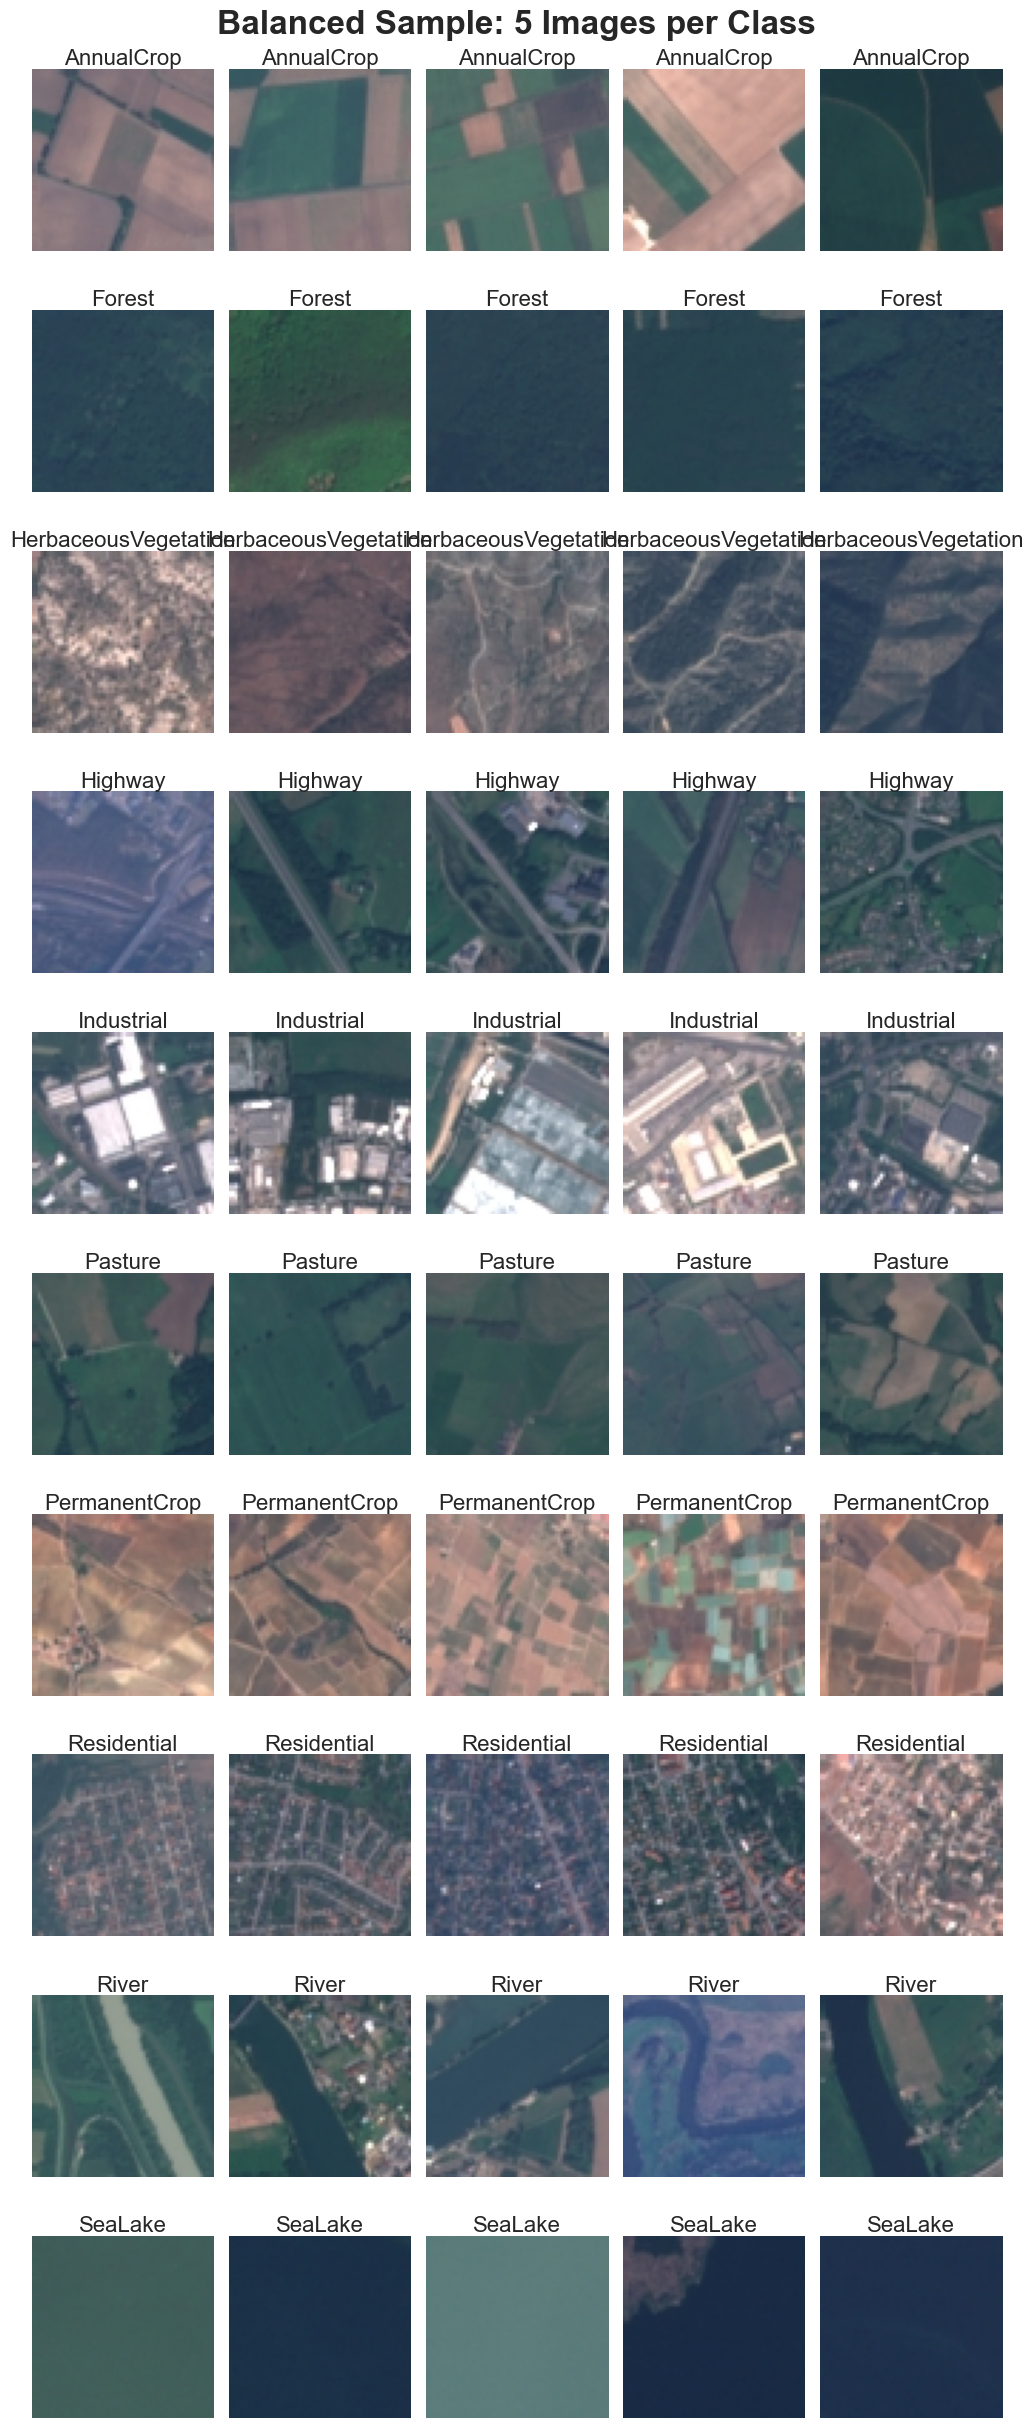

In [4]:
fig, axes = plt.subplots(10, 5, figsize=(10, 25))

sample_count_per_class = 5
selected_indices = []

for class_idx in range(len(class_names)):
    class_mask = labels == class_idx
    class_indices = np.where(class_mask)[0]
    selected = np.random.choice(
        class_indices, size=sample_count_per_class, replace=False
    )
    selected_indices.extend(selected)

# Plot images
for i, ax in enumerate(axes.flat):
    idx = selected_indices[i]
    img = data[idx]
    label = labels[idx]
    class_name = class_names[label]

    # Display image
    ax.imshow(img)
    ax.set_title(class_name, fontsize=16, pad=3)
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.suptitle("Balanced Sample: 5 Images per Class", fontsize=24, fontweight="bold")
plt.show()

## Dataset statistics

In [5]:
# Number of samples per class
class_counts = Counter(labels)

for idx, class_name in enumerate(class_names):
    count = class_counts[idx]
    percentage = (count / len(labels)) * 100
    print(f"{class_name:25s}: {count:4d} images ({percentage:4.2f}%)")

AnnualCrop               : 3000 images (11.11%)
Forest                   : 3000 images (11.11%)
HerbaceousVegetation     : 3000 images (11.11%)
Highway                  : 2500 images (9.26%)
Industrial               : 2500 images (9.26%)
Pasture                  : 2000 images (7.41%)
PermanentCrop            : 2500 images (9.26%)
Residential              : 3000 images (11.11%)
River                    : 2500 images (9.26%)
SeaLake                  : 3000 images (11.11%)


In [6]:
# Images statistics
print(f"Total number of images      : {len(data)}")
print(f"Number of classes           : {len(class_names)}")
print(f"Image shape                 : {data[0].shape}")
print(f"Data array shape            : {data.shape}")
print(f"Data array dtype            : {data.dtype}")
print(f"Labels array shape          : {labels.shape}")
print(f"Labels array dtype          : {labels.dtype}")

Total number of images      : 27000
Number of classes           : 10
Image shape                 : (64, 64, 3)
Data array shape            : (27000, 64, 64, 3)
Data array dtype            : uint8
Labels array shape          : (27000,)
Labels array dtype          : int64


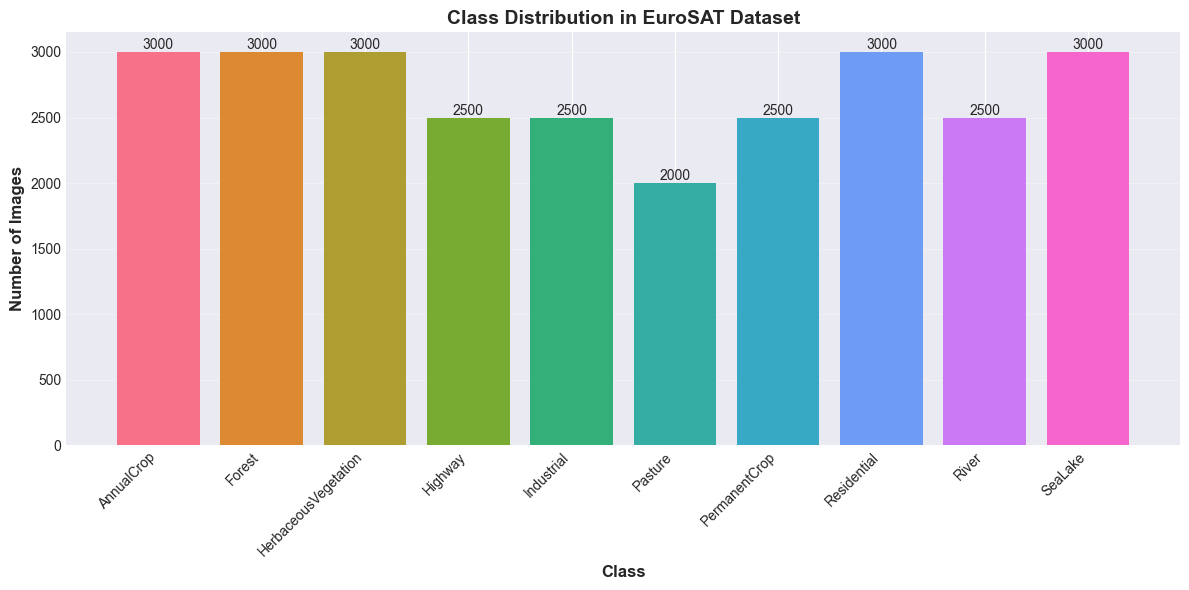

In [7]:
# Class distribution
fig, ax = plt.subplots(figsize=(12, 6))
counts = [class_counts[i] for i in range(len(class_names))]
bars = ax.bar(class_names, counts, color=sns.color_palette("husl", len(class_names)))
ax.set_xlabel("Class", fontsize=12, fontweight="bold")
ax.set_ylabel("Number of Images", fontsize=12, fontweight="bold")
ax.set_title("Class Distribution in EuroSAT Dataset", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
ax.grid(axis="y", alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

## Image analysis

In [8]:
# Image statistics
print(f"Minimum pixel value       : {data.min()}")
print(f"Maximum pixel value       : {data.max()}")
print(f"Mean pixel value          : {data.mean():.2f}")
print(f"Std pixel value           : {data.std():.2f}")
print(f"Median pixel value        : {np.median(data):.2f}")

Minimum pixel value       : 0
Maximum pixel value       : 255
Mean pixel value          : 96.26
Std pixel value           : 40.37
Median pixel value        : 90.00


In [9]:
# Per-channel statistics (assuming RGB)
if data.shape[-1] == 3:
    channels = ["Red", "Green", "Blue"]
    for i, channel in enumerate(channels):
        print(f"\n{channel} Channel:")
        print(f"  Min       : {data[..., i].min()}")
        print(f"  Max       : {data[..., i].max()}")
        print(f"  Mean      : {data[..., i].mean():.2f}")
        print(f"  Std       : {data[..., i].std():.2f}")


Red Channel:
  Min       : 0
  Max       : 255
  Mean      : 87.82
  Std       : 51.68

Green Channel:
  Min       : 3
  Max       : 255
  Mean      : 96.97
  Std       : 34.91

Blue Channel:
  Min       : 5
  Max       : 255
  Mean      : 103.98
  Std       : 29.47


In [10]:
# Brightness
# https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color
brightness = 0.299 * data[..., 0] + 0.587 * data[..., 1] + 0.114 * data[..., 2]
print(f"Mean brightness           : {brightness.mean():.2f}")
print(f"Std brightness            : {brightness.std():.2f}")
print(f"Min brightness            : {brightness.min():.2f}")
print(f"Max brightness            : {brightness.max():.2f}")

Mean brightness           : 95.03
Std brightness            : 38.67
Min brightness            : 5.12
Max brightness            : 255.00


In [11]:
# Contrast (std of pixel values per image)
# https://stackoverflow.com/questions/52094592/calculate-contrast-of-a-color-imagergb
contrast = data.std(axis=(1, 2, 3))
print(f"Mean contrast             : {contrast.mean():.2f}")
print(f"Std contrast              : {contrast.std():.2f}")
print(f"Min contrast              : {contrast.min():.2f}")
print(f"Max contrast              : {contrast.max():.2f}")

Mean contrast             : 24.07
Std contrast              : 10.11
Min contrast              : 1.94
Max contrast              : 75.59


In [12]:
# Statistics per class
stats_data = []
for idx, class_name in enumerate(class_names):
    class_mask = labels == idx
    class_images = data[class_mask]

    # Calculate brightness for this class
    class_brightness = (
        0.299 * class_images[..., 0]
        + 0.587 * class_images[..., 1]
        + 0.114 * class_images[..., 2]
    )

    # Calculate contrast for this class
    class_contrast = class_images.std(axis=(1, 2, 3))

    stats_data.append(
        {
            "Class": class_name,
            "Count": class_mask.sum(),
            "Mean Pixel": class_images.mean(),
            "Std Pixel": class_images.std(),
            "Mean Brightness": class_brightness.mean(),
            "Std Brightness": class_brightness.std(),
            "Mean Contrast": class_contrast.mean(),
            "Std Contrast": class_contrast.std(),
            "Min Pixel": class_images.min(),
            "Max Pixel": class_images.max(),
        }
    )

stats_df = pd.DataFrame(stats_data)
print(stats_df.round(2).to_string(index=False))

               Class  Count  Mean Pixel  Std Pixel  Mean Brightness  Std Brightness  Mean Contrast  Std Contrast  Min Pixel  Max Pixel
          AnnualCrop   3000      122.26      42.59           122.56           39.40          30.58         10.42         23        255
              Forest   3000       59.93      17.46            58.26            8.10          16.09          1.53         16        228
HerbaceousVegetation   3000      100.28      31.45            99.16           30.73          18.23          8.15         17        255
             Highway   2500       96.03      37.08            94.86           35.29          25.70          7.01          0        255
          Industrial   2500      127.71      49.00           125.82           48.56          42.66          9.14         11        255
             Pasture   2000       81.51      22.88            81.17           15.13          18.51          3.82         14        255
       PermanentCrop   2500      117.39      36.81     

## Color analysis

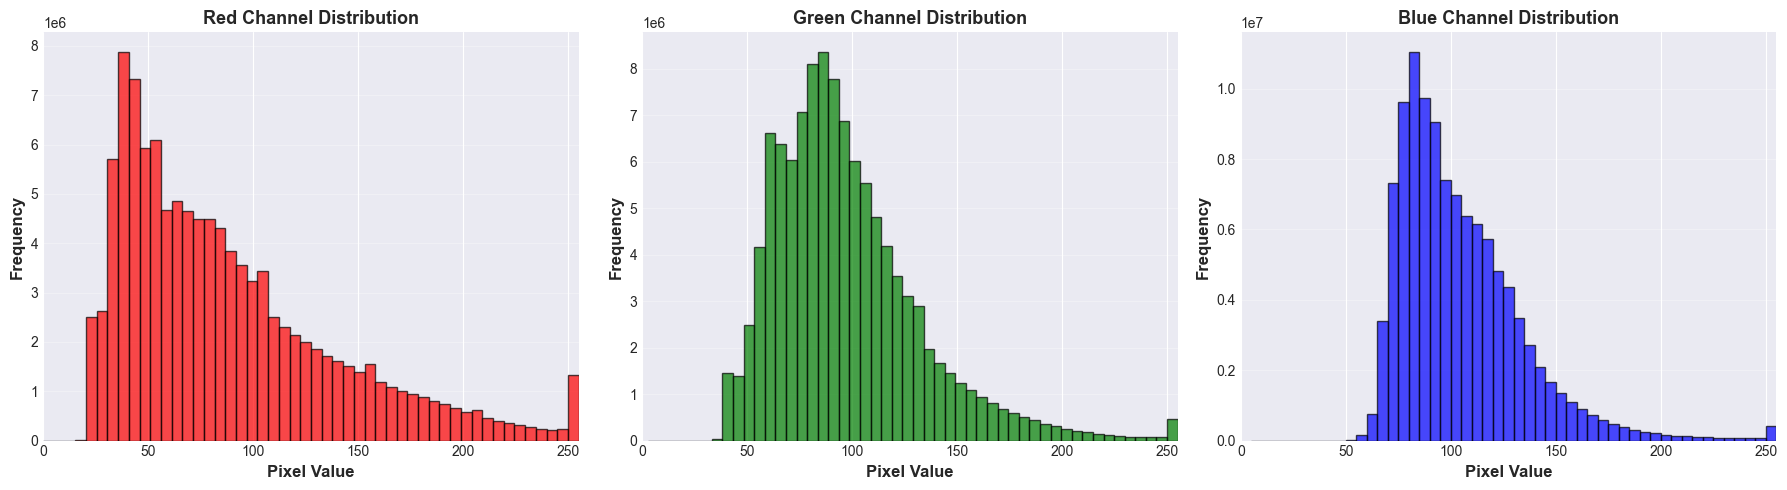

In [13]:
# Color distribution histogram
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ["red", "green", "blue"]
channels = ["Red", "Green", "Blue"]

for i, (ax, color, channel) in enumerate(zip(axes, colors, channels)):
    ax.hist(data[..., i].flatten(), bins=50, color=color, alpha=0.7, edgecolor="black")
    ax.set_xlabel("Pixel Value", fontsize=12, fontweight="bold")
    ax.set_ylabel("Frequency", fontsize=12, fontweight="bold")
    ax.set_title(f"{channel} Channel Distribution", fontsize=13, fontweight="bold")
    ax.grid(axis="y", alpha=0.3)
    ax.set_xlim(0, 255)

plt.tight_layout()
plt.show()

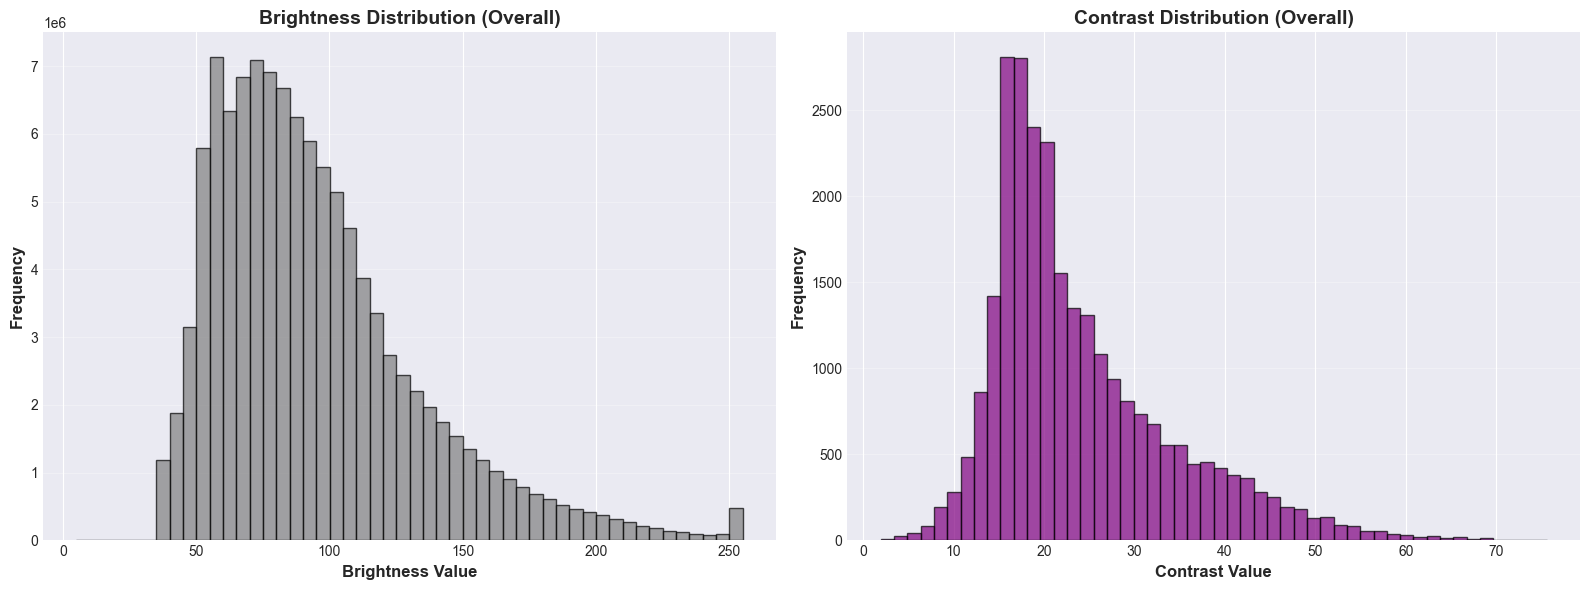

In [14]:
# Brightness and Contrast distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Brightness
axes[0].hist(brightness.flatten(), bins=50, color="gray", alpha=0.7, edgecolor="black")
axes[0].set_xlabel("Brightness Value", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Frequency", fontsize=12, fontweight="bold")
axes[0].set_title("Brightness Distribution (Overall)", fontsize=14, fontweight="bold")
axes[0].grid(axis="y", alpha=0.3)

# Contrast
axes[1].hist(contrast, bins=50, color="purple", alpha=0.7, edgecolor="black")
axes[1].set_xlabel("Contrast Value", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Frequency", fontsize=12, fontweight="bold")
axes[1].set_title("Contrast Distribution (Overall)", fontsize=14, fontweight="bold")
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

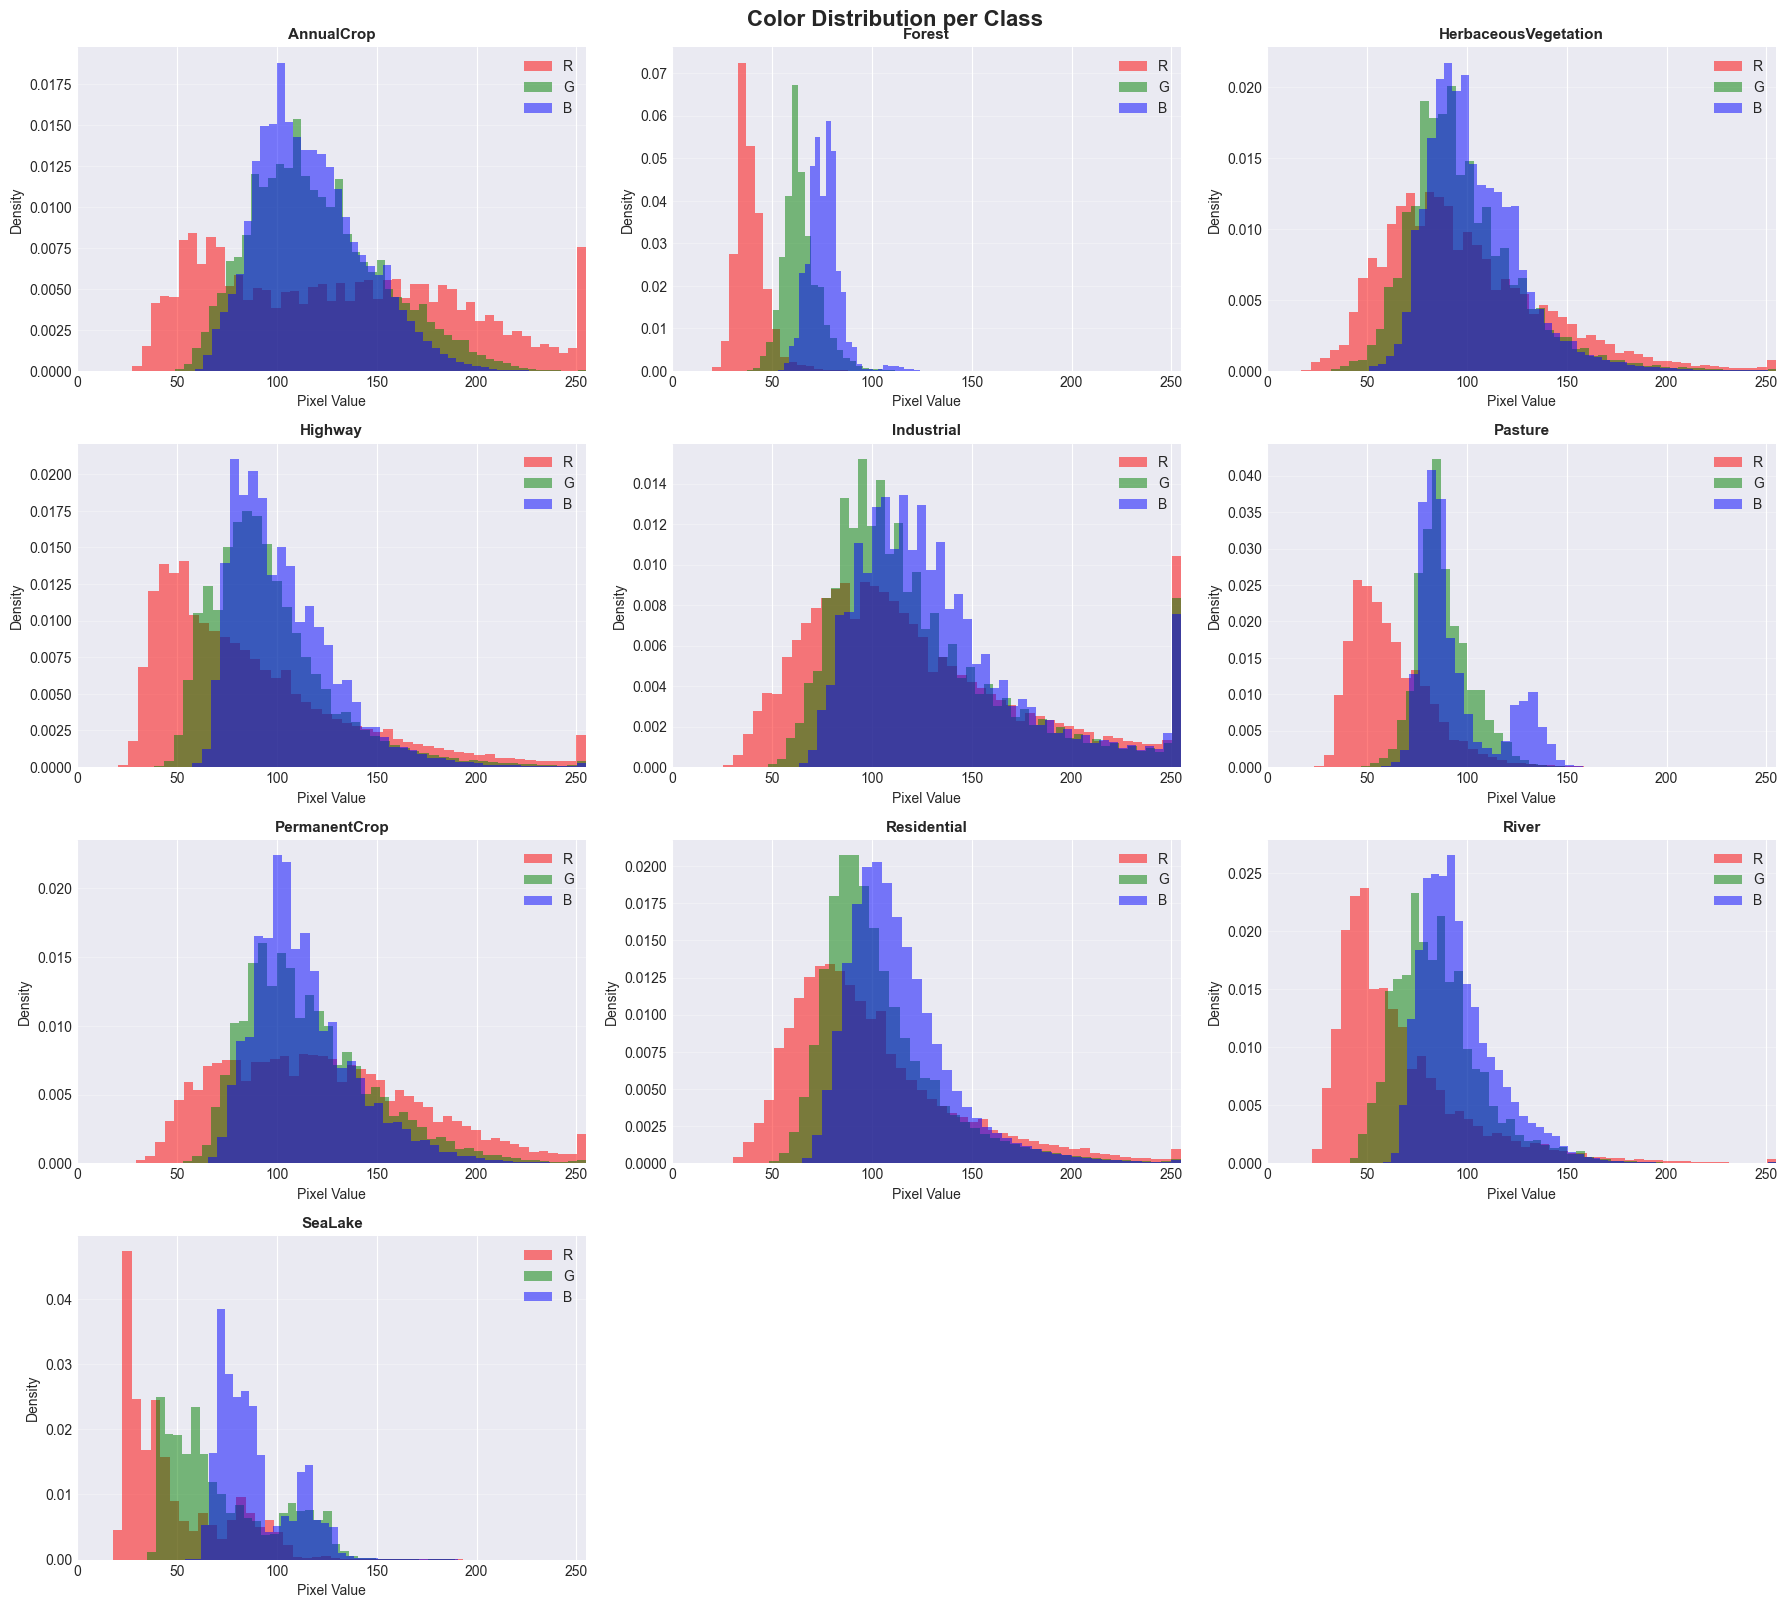

In [15]:
# Per-class color distribution
n_classes = len(class_names)
n_cols = 3
n_rows = (n_classes + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, class_name in enumerate(class_names):
    ax = axes[idx]
    class_mask = labels == idx
    class_images = data[class_mask]

    # Plot RGB histograms for this class
    for i, (color, channel) in enumerate(
        zip(["red", "green", "blue"], ["R", "G", "B"])
    ):
        ax.hist(
            class_images[..., i].flatten(),
            bins=50,
            color=color,
            alpha=0.5,
            label=channel,
            density=True,
        )

    ax.set_xlabel("Pixel Value", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)
    ax.set_title(f"{class_name}", fontsize=11, fontweight="bold")
    ax.legend()
    ax.grid(axis="y", alpha=0.3)
    ax.set_xlim(0, 255)

# Hide unused subplots
for idx in range(n_classes, len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.suptitle("Color Distribution per Class", fontsize=16, fontweight="bold", y=1.002)
plt.show()

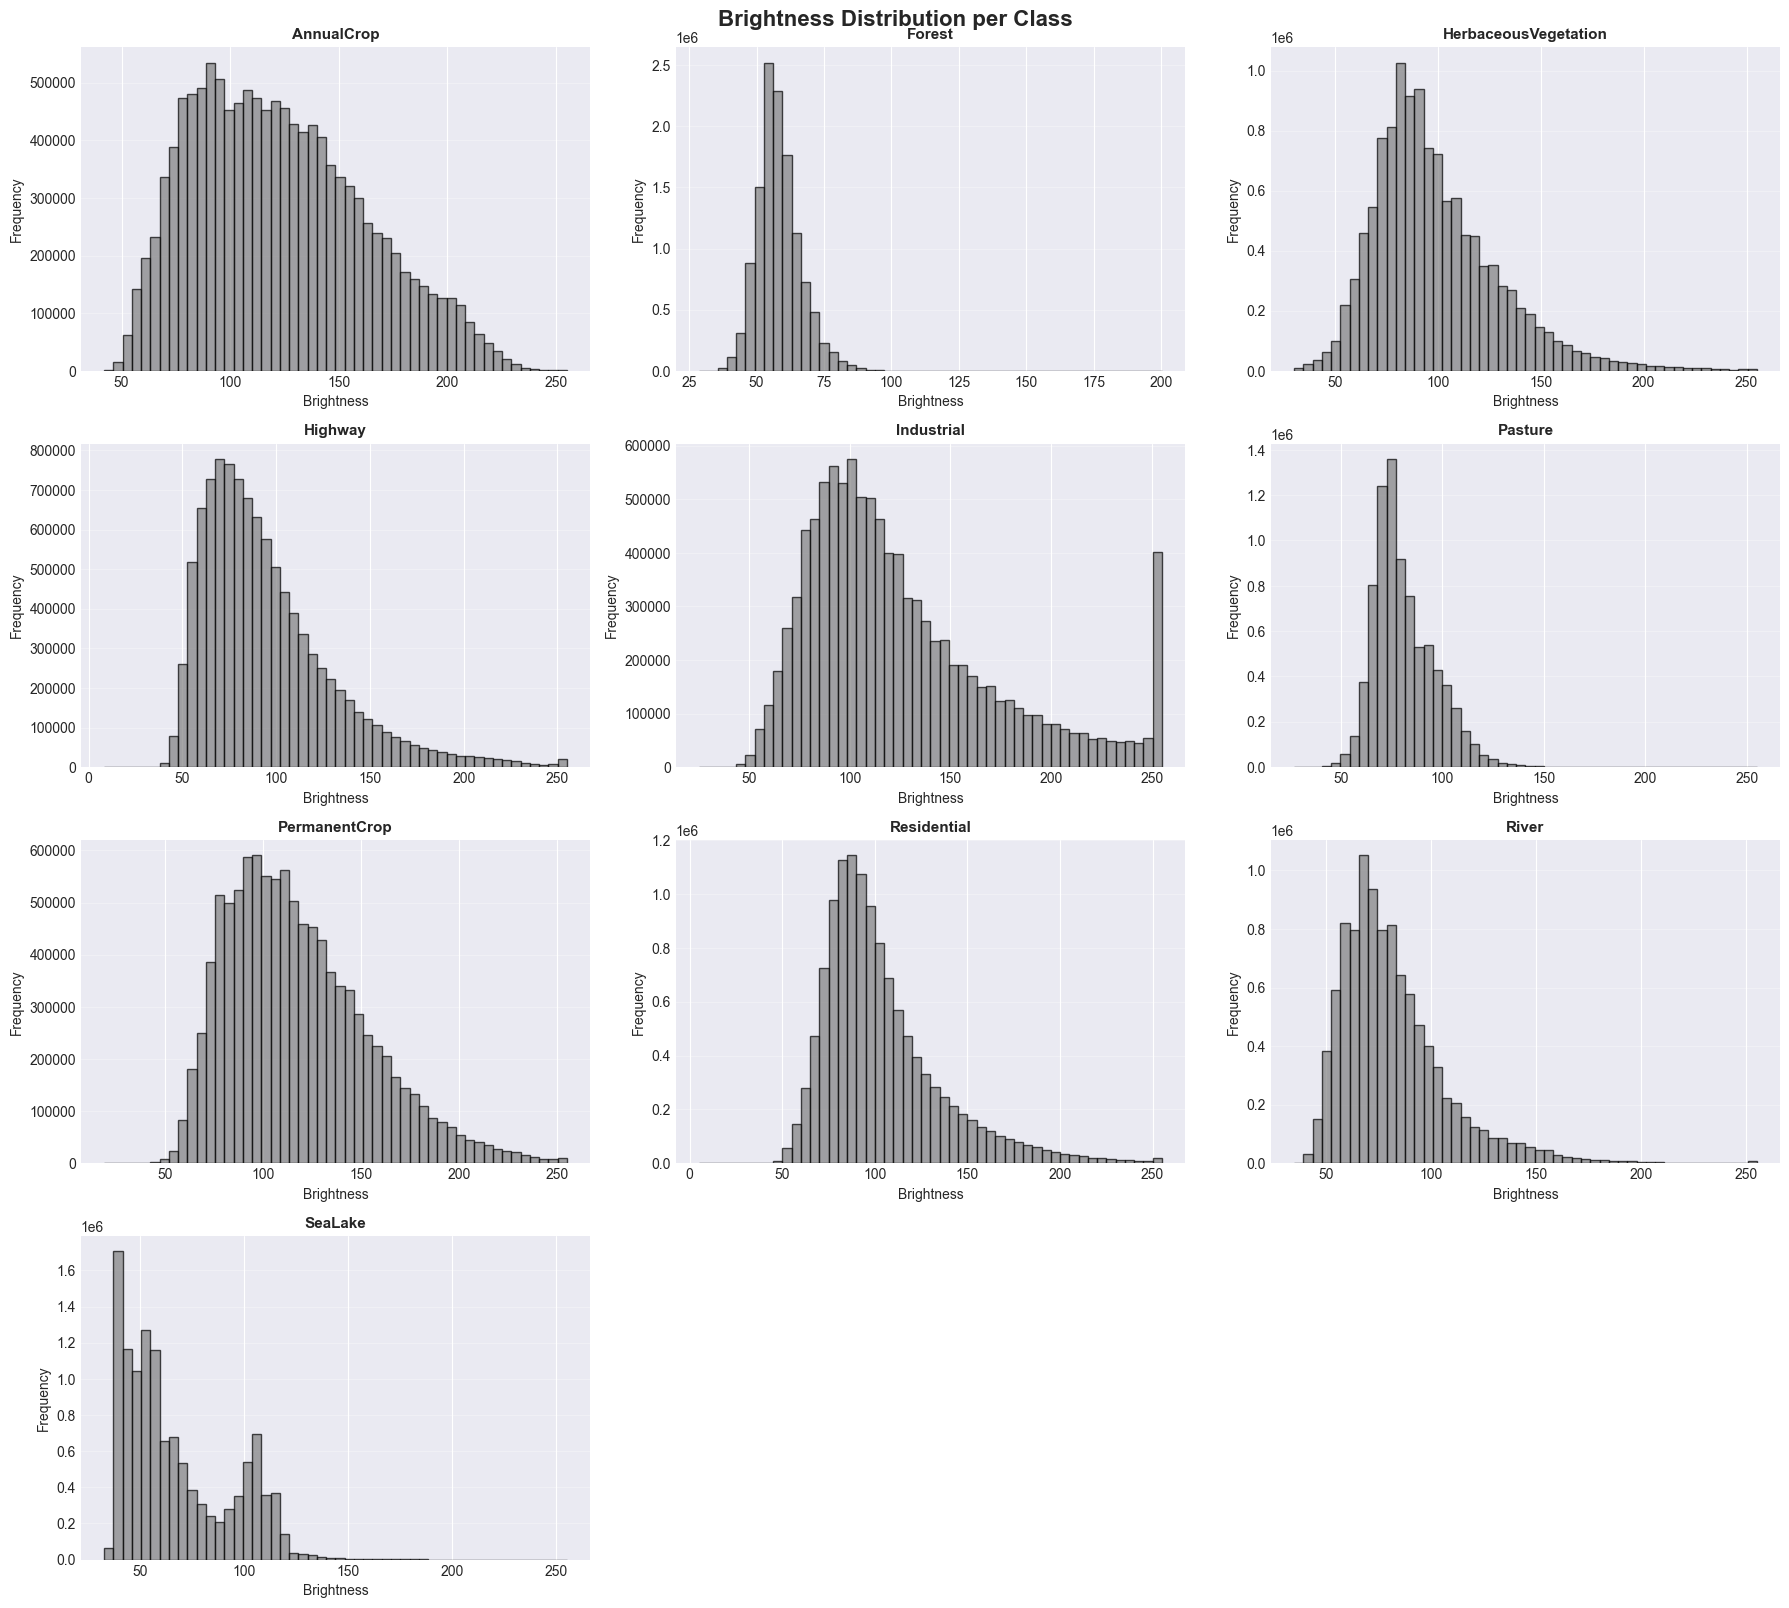

In [16]:
# Brightness distribution per class
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, class_name in enumerate(class_names):
    ax = axes[idx]
    class_mask = labels == idx
    class_images = data[class_mask]

    # Calculate brightness for this class
    class_brightness = (
        0.299 * class_images[..., 0]
        + 0.587 * class_images[..., 1]
        + 0.114 * class_images[..., 2]
    )

    ax.hist(
        class_brightness.flatten(), bins=50, color="gray", alpha=0.7, edgecolor="black"
    )
    ax.set_xlabel("Brightness", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.set_title(f"{class_name}", fontsize=11, fontweight="bold")
    ax.grid(axis="y", alpha=0.3)

# Hide unused subplots
for idx in range(n_classes, len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.suptitle(
    "Brightness Distribution per Class", fontsize=16, fontweight="bold", y=1.002
)
plt.show()

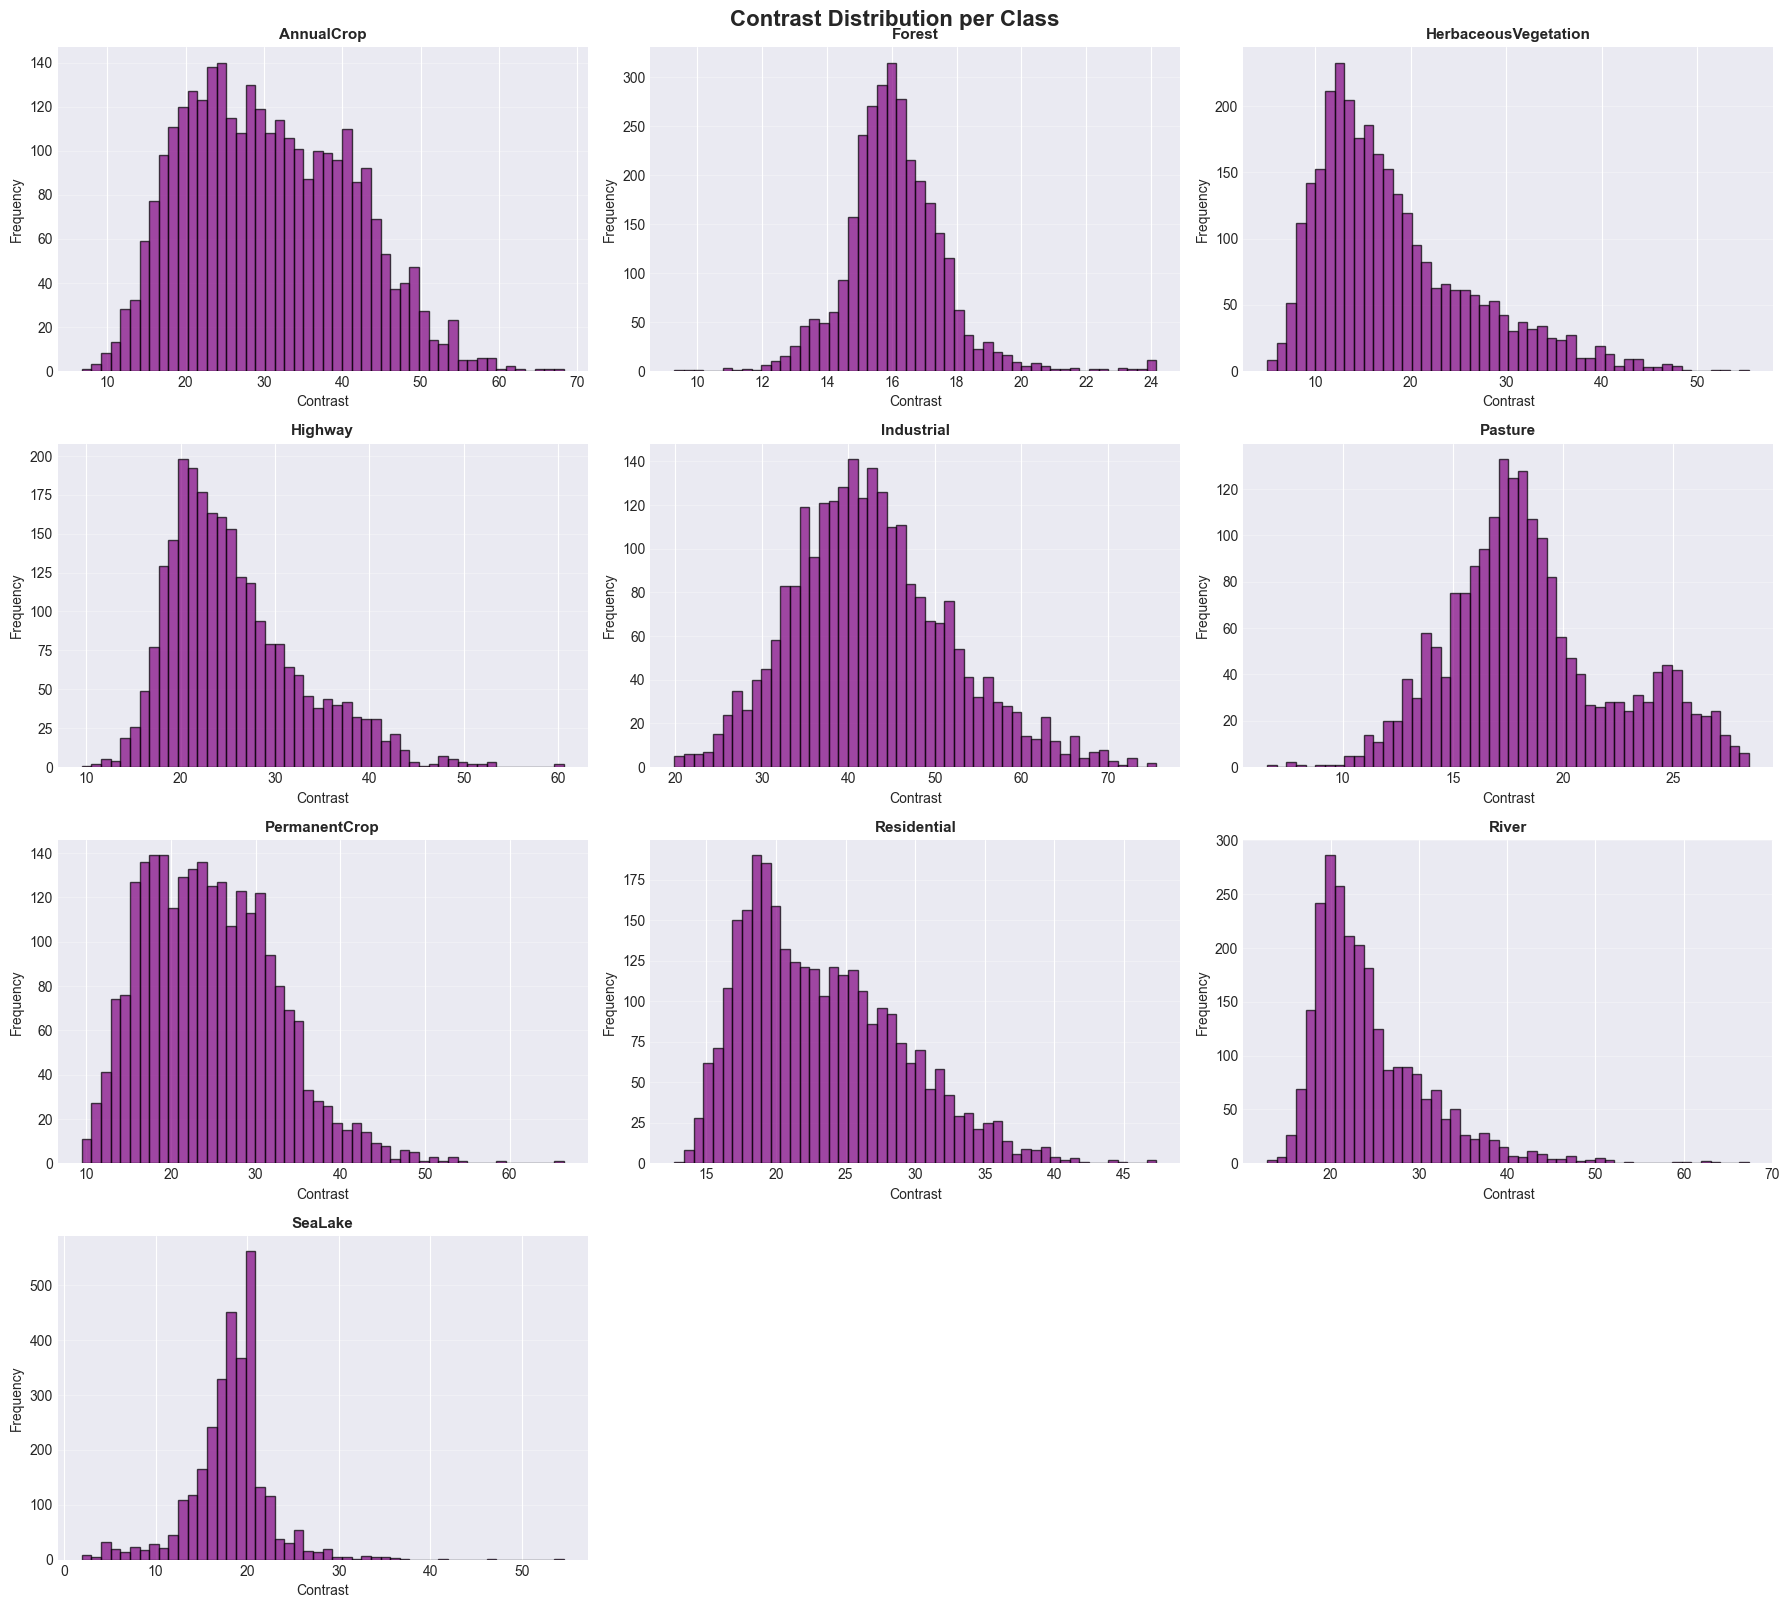

In [17]:
# Contrast distribution per class
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, class_name in enumerate(class_names):
    ax = axes[idx]
    class_mask = labels == idx
    class_images = data[class_mask]

    # Calculate contrast for this class
    class_contrast = class_images.std(axis=(1, 2, 3))

    ax.hist(
        class_contrast.flatten(), bins=50, color="purple", alpha=0.7, edgecolor="black"
    )
    ax.set_xlabel("Contrast", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.set_title(f"{class_name}", fontsize=11, fontweight="bold")
    ax.grid(axis="y", alpha=0.3)

# Hide unused subplots
for idx in range(n_classes, len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.suptitle("Contrast Distribution per Class", fontsize=16, fontweight="bold", y=1.002)
plt.show()